In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

sns.set()

In [67]:
customer_data = pd.read_csv('Credit Card Customer Data.csv')
customer_data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [68]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [69]:
customer_data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [70]:
customer_data.duplicated().sum()

0

In [71]:
customer_data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [72]:
data = customer_data.copy()

In [73]:
data['Total_interaction'] = data['Total_visits_bank'] + data['Total_visits_online'] + data['Total_calls_made']

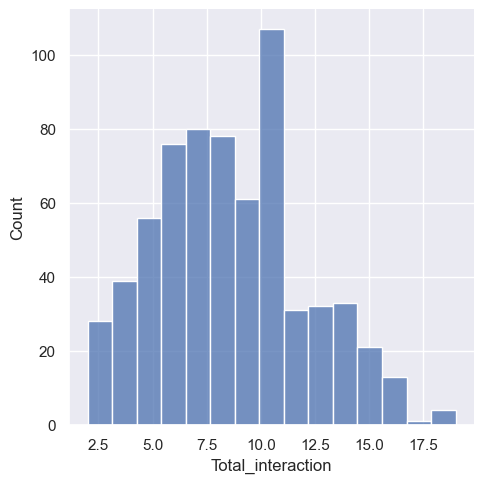

In [74]:
sns.displot(data['Total_interaction'] )

<Axes: xlabel='Total_interaction', ylabel='Count'>

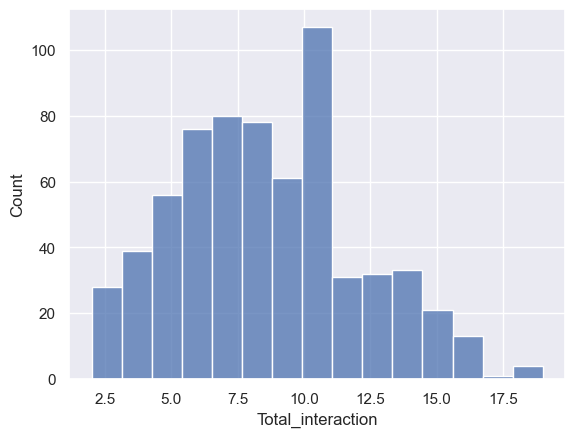

In [75]:
sns.histplot(data['Total_interaction'])

<Axes: xlabel='Total_Credit_Cards', ylabel='Count'>

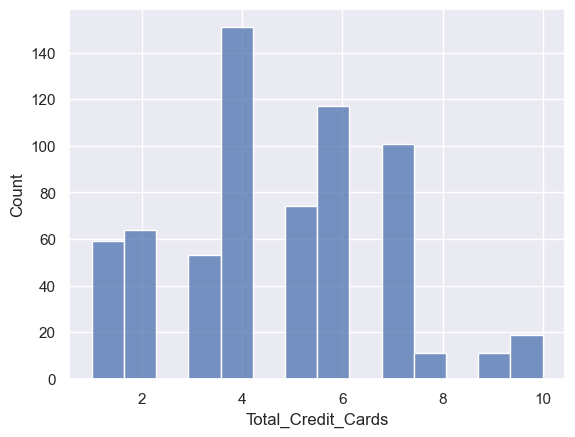

In [76]:
sns.histplot(data['Total_Credit_Cards'])

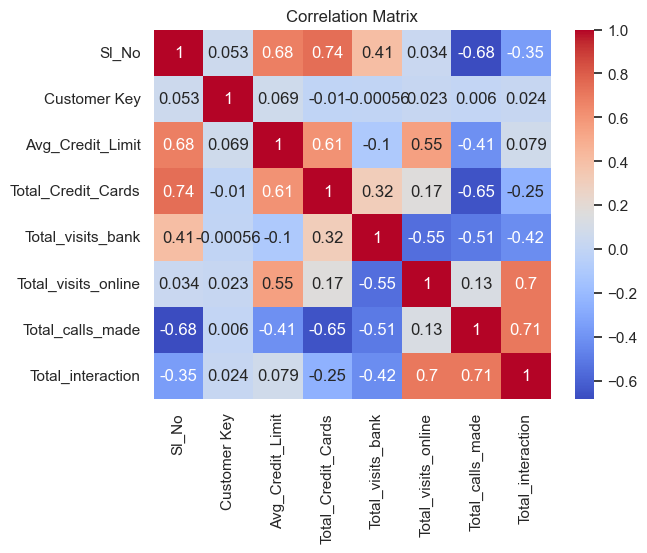

In [77]:
corr = data.corr()
correlation_matrix = corr
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

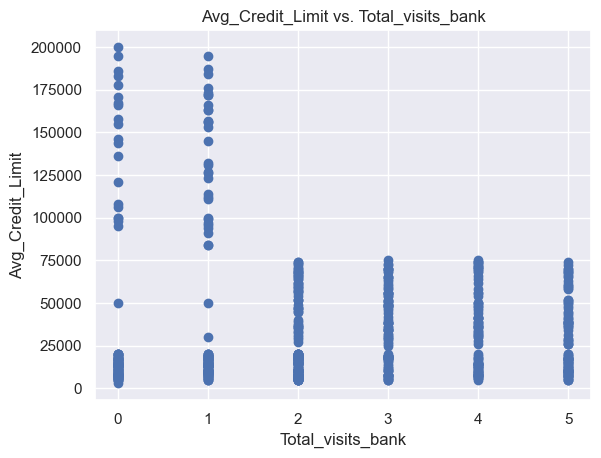

In [78]:
plt.scatter(data['Total_visits_bank'], data['Avg_Credit_Limit'])
plt.xlabel('Total_visits_bank')
plt.ylabel('Avg_Credit_Limit')
plt.title('Avg_Credit_Limit vs. Total_visits_bank')
plt.show()

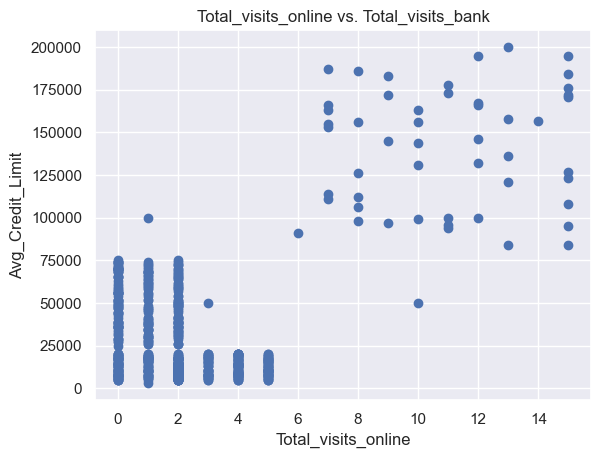

In [79]:
plt.scatter(data['Total_visits_online'], data['Avg_Credit_Limit'])
plt.xlabel('Total_visits_online')
plt.ylabel('Avg_Credit_Limit')
plt.title('Total_visits_online vs. Total_visits_bank')
plt.show()

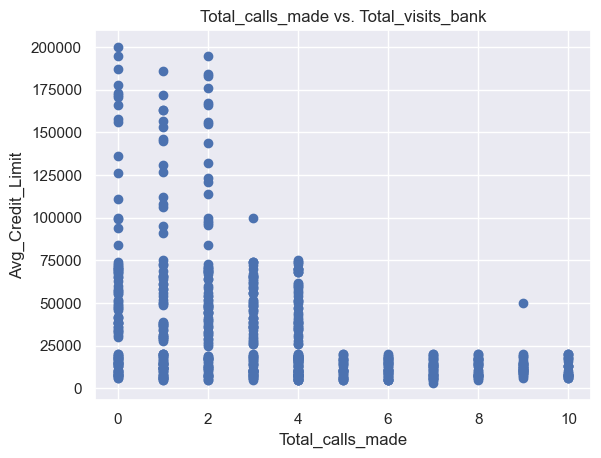

In [80]:
plt.scatter(data['Total_calls_made'], data['Avg_Credit_Limit'])
plt.xlabel('Total_calls_made')
plt.ylabel('Avg_Credit_Limit')
plt.title('Total_calls_made vs. Total_visits_bank')
plt.show()

In [97]:
X = data[['Avg_Credit_Limit', 'Total_visits_bank', 'Total_Credit_Cards']].values
X

array([[100000,      1,      2],
       [ 50000,      0,      3],
       [ 50000,      1,      7],
       ...,
       [145000,      1,      8],
       [172000,      1,     10],
       [167000,      0,      9]], dtype=int64)

C:\Users\Gopal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gopal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Gopal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gopal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'Within-cluster Sum of Squares')

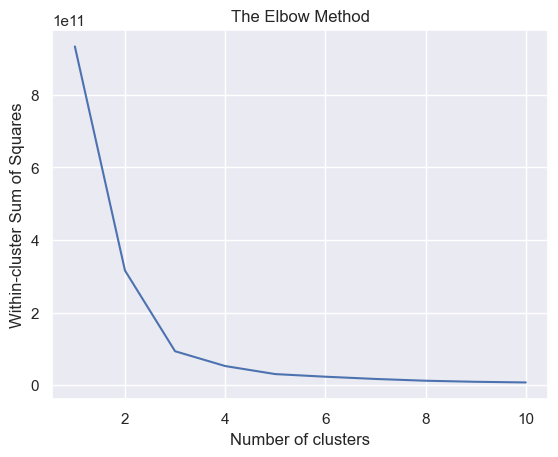

In [98]:
wcss=[]

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [99]:
Kmeans = KMeans(3)
Y = Kmeans.fit_predict(X)
Y

C:\Users\Gopal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gopal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

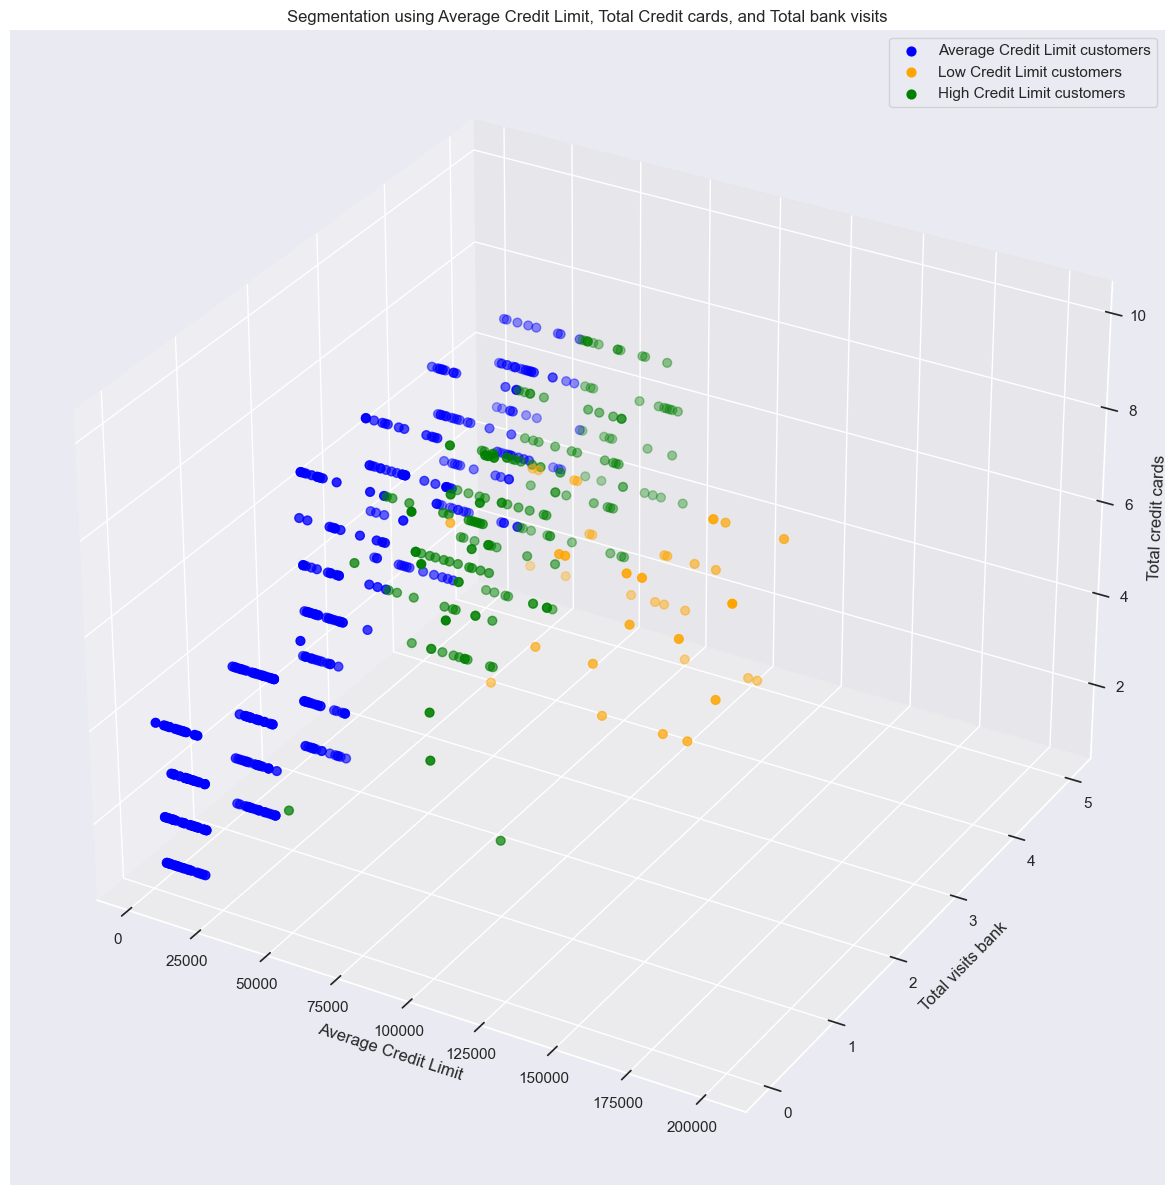

In [101]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[Y == 0, 0], X[Y == 0, 1], X[Y == 0, 2], s = 40 , color = 'blue', 
           label = "Average Credit Limit customers")
ax.scatter(X[Y == 1, 0], X[Y == 1, 1], X[Y == 1, 2], s = 40 , color = 'orange', 
           label = "Low Credit Limit customers")
ax.scatter(X[Y == 2, 0], X[Y == 2, 1], X[Y == 2, 2], s = 40 , color = 'green', 
           label = "High Credit Limit customers")
plt.title('Segmentation using Average Credit Limit, Total Credit cards, and Total bank visits')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total visits bank')
ax.set_zlabel('Total credit cards')
ax.legend()
plt.show()